Pixeltests School Data Science

*Unit 2, Sprint 2, Module 1*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/pixeltests/datasets/main/'
    !pip install category_encoders
    !pip install pandas-profiling

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Decision Trees

This week, the module projects will focus on creating and improving a model for the Tanazania Water Pump dataset. Your goal is to create a model to predict whether a water pump is functional, non-functional, or needs repair.

Dataset source: [DrivenData.org](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/).

## Directions

The tasks for this project are as follows:

- **Task 1:** Enter the [Kaggle](https://www.kaggle.com/t/6169ee7701164d24943c98eda2de9b5e) competition using exactly this link!
- **Task 2:** Use `wrangle` function to import training and test data.
- **Task 3:** Split training data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build and train `model_dt`.
- **Task 7:** Calculate the training and validation accuracy score for your model.
- **Task 8:** Adjust model's `max_depth` to reduce overfitting.
- **Task 9 `stretch goal`:** Create a horizontal bar chart showing the 10 most important features for your model.

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `pandas-profiling`
- `sklearn`

# Kaggle

**Task 1:** Enter the [Kaggle](https://www.kaggle.com/t/6169ee7701164d24943c98eda2de9b5e) competition using exactly this link! **We recommend that you choose a username that's based on your name, since you might include it in your resume in the future.**. Go to the **Rules** page. Accept the rules of the competition. Notice that the **Rules** page also has instructions for the Submission process. The **Data** page has feature definitions.

# I. Wrangle Data

In [15]:
import pandas as pd
def wrangle(fm_path, tv_path=None):
    if tv_path:
        df = pd.merge(pd.read_csv(fm_path,
                                  na_values=[0, -2.000000e-08], compression='zip'),
                      pd.read_csv(tv_path, compression='zip'), left_index=True, right_index=True)
        # .set_index('id')
    else:
        df = pd.read_csv(fm_path,
                         na_values=[0, -2.000000e-08],
                         compression='zip')
      # df = pd.read_csv(fm_path,
      #                    na_values=[0, -2.000000e-08],
      #                    index_col='id', compression='zip')
    # Drop constant columns
    df.drop(columns=['recorded_by'], inplace=True)

    # Drop HCCCs
    cutoff = 100
    drop_cols = [col for col in df.select_dtypes('object').columns
                 if df[col].nunique() > cutoff]
    df.drop(columns=drop_cols, inplace=True)

    # Drop duplicate columns
    dupe_cols = [col for col in df.head(15).T.duplicated().index
                 if df.head(15).T.duplicated()[col]]
    df.drop(columns=dupe_cols, inplace=True)

    return df

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Task 1:** Using the `wrangle` function above, read the `train_features.csv` and  `train_labels.csv` files into the DataFrame `df`. Next, use the same function to read the test set `test_features.csv` into the DataFrame `X_test`.

In [11]:
train_features_path = '/content/drive/MyDrive/AIfiles/train_features.csv.zip'
train_labels_path = '/content/drive/MyDrive/AIfiles/train_labels.zip'
test_features_path = '/content/drive/MyDrive/AIfiles/test_features.csv.zip'

In [7]:
# df = wrangle(train_labels_path,train_features_path)
train_features = pd.read_csv(train_features_path, compression='zip')

In [8]:
train_features.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,1027,50.0,2013-02-13,Kiuma,690,KIUMA,36.957086,-11.311964,Kwa Mkwanda Mohamed,0,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
1,16782,0.0,2011-07-26,Hesawa,0,DWE,33.058573,-2.595762,Kwa Lujina,0,...,monthly,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
2,13169,0.0,2011-03-14,Ded,0,DWE,35.238216,-5.168248,Kilimba A,0,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe


In [12]:
test_features = pd.read_csv(test_features_path, compression='zip')
test_features.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,53352,0.0,2012-10-02,Dwsp,0,DWSP,32.899425,-3.316937,Kwa Mwapinda,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
1,69486,0.0,2011-04-04,Government Of Tanzania,0,DWE,33.454783,-8.755486,Zahanati,0,...,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
2,10214,0.0,2011-04-13,NaN,0,NaN,33.831630,-9.238255,Lupaso Primary School,0,...,unknown,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
train_labels = pd.read_csv(train_labels_path, compression='zip')
train_labels.head(3)

,status_group
0,functional needs repair
1,functional
2,functional


In [16]:
df = wrangle(train_features_path,train_labels_path)
df.head(3)

,id,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,...,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,1027.0,50.0,690.0,36.957086,-11.311964,NaN,Ruvuma / Southern Coast,Ruvuma,10,1.0,...,per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional needs repair
1,16782.0,NaN,NaN,33.058573,-2.595762,NaN,Lake Victoria,Mwanza,19,2.0,...,monthly,soft,good,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
2,13169.0,NaN,NaN,35.238216,-5.168248,NaN,Internal,Dodoma,1,1.0,...,per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


In [17]:
X_test = wrangle(test_features_path)
X_test.head(3)

,id,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,53352,NaN,NaN,32.899425,-3.316937,NaN,Lake Victoria,Shinyanga,17,3.0,...,never pay,never pay,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump
1,69486,NaN,NaN,33.454783,-8.755486,NaN,Lake Rukwa,Mbeya,12,2.0,...,pay monthly,monthly,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe
2,10214,NaN,NaN,33.831630,-9.238255,NaN,Lake Nyasa,Mbeya,12,4.0,...,unknown,unknown,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe


# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'status_group'`.

In [18]:
target = 'status_group'
y = df[target]
X = df.drop(target,axis=1)

**Task 4:** Using a randomized split, divide `X` and `y` into a training set (`X_train`, `y_train`) and a validation set (`X_val`, `y_val`).

In [19]:
from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = ..., ..., ..., ...
# X_train, X_val = train_test_split(X, train_size=0.80, test_size=0.20, stratify=train['status_group'], random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)
print(pd.Series(y_train).value_counts())
print(pd.Series(y_val).value_counts())

functional                 20646
non functional             14607
functional needs repair     2763
Name: status_group, dtype: int64
functional                 5161
non functional             3652
functional needs repair     691
Name: status_group, dtype: int64


In [57]:
# print(pd.Series(X_train).value_counts())
# print(pd.Series(X_val).value_counts())
if X_train.empty:
    print("DataFrame is empty")
else:
    print("DataFrame is not empty")

DataFrame is not empty


In [20]:
print('shape of x_train, x_val, y_train, y_val', X_train.shape, X_val.shape, y_train.shape, y_val.shape)

shape of x_train, x_val, y_train, y_val (38016, 30) (9504, 30) (38016,) (9504,)


# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents.

In [21]:
X_train.isnull().sum().sum()

113166

In [22]:
from sklearn.metrics import accuracy_score
majority_class =  y_train.mode()[0]
y_pred = [majority_class] * len(y_train)
baseline_acc =  accuracy_score(y_train, y_pred)
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.5430871212121212


# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_dt`, and fit it to your training data. Your `Pipeline` should include:

- an `OrdinalEncoder` transformer for categorical features.
- a `SimpleImputer` transformer fot missing values.
- a `DecisionTreeClassifier` predictor.

**Note:** Don't forget to set the `random_state` parameter for your `DecisionTreeClassifier`.

In [60]:
X_train.shape

(38016, 30)

In [61]:
y_train.shape

(38016,)

In [23]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model_dt = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    DecisionTreeClassifier(min_samples_leaf=30, random_state=30)
)
model_dt.fit(X_train, y_train)

# print('Train Accuracy', model_dt.score(X_train, y_train))
# print('Val Accuracy', model_dt.score(X_val, y_val))


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'public_meeting',
                                     'scheme_management', 'permit',
                                     'extraction_type', 'extraction_type_group',
                                     'extraction_type_class', 'management',
                                     'management_group', 'payment',
                                     'payment_type', 'water_quality',
                                     'quality_group', 'quantity', 'source',
                                     'source_type', 'source_class',
                                     'waterpoint_type',
                                     'waterpoint_type_group'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(min_samples_leaf=30, random_state=30))])

# V. Check Metrics

**Task 7:** Calculate the training and validation accuracy scores for `model_dt`.

In [24]:
training_acc = model_dt.score(X_train, y_train)
val_acc = model_dt.score(X_val, y_val)

print('Training Accuracy Score:', training_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 0.7896675084175084
Validation Accuracy Score: 0.757996632996633


# VI. Tune Model

**Task 8:** Is there a large difference between your training and validation accuracy? If so, experiment with different setting for `max_depth` in your `DecisionTreeClassifier` to reduce the amount of overfitting in your model.

In [88]:
# Use this cell to experiment and then change
# your model hyperparameters in Task 6

# model_dt = make_pipeline(
#     ce.OneHotEncoder(use_cat_names=True),
#     SimpleImputer(strategy='mean'),
#     DecisionTreeClassifier(min_samples_leaf=30, random_state=30)
# )
# model_dt.fit(X_train, y_train)


In [89]:
# training_acc = model_dt.score(X_train, y_train)
# val_acc = model_dt.score(X_val, y_val)

# print('Training Accuracy Score:', training_acc)
# print('Validation Accuracy Score:', val_acc)


# VII. Communicate Results

**Task 9 `stretch goal`:** Create a horizontal barchart that shows the the 10 most important features for model_dt, sorted by value.

**Note:** [`DecisionTreeClassifier.feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreecla#sklearn.tree.DecisionTreeClassifier.feature_importances_) returns values that are different from [`LogisticRegression.coef_`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). All the values will be positive, and they will sum to `1`.

In [25]:
# model_dt.named_steps['decisiontreeclassifier'].feature_importances_
y_pred = model_dt.predict(X_test)
y_pred

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'functional'], dtype=object)

In [27]:
import numpy as np
status_array = y_pred
status_mapping = {
    "functional": 0,
    "functional needs repair": 1,
    "non functional": 2
}
replaced_array = np.where(np.isin(status_array, list(status_mapping.keys())), status_array, -1)
replaced_array = np.vectorize(status_mapping.get)(replaced_array)
print(replaced_array)

[2 0 0 ... 0 0 0]


In [28]:
data = {'S.No.': range(1, len(replaced_array) + 1), 'status_group': replaced_array}
data_submit = pd.DataFrame(data)
# print(data_submit.head())
data_submit.to_csv('tanzania_sample_solution.csv',index=False)

<Axes: >

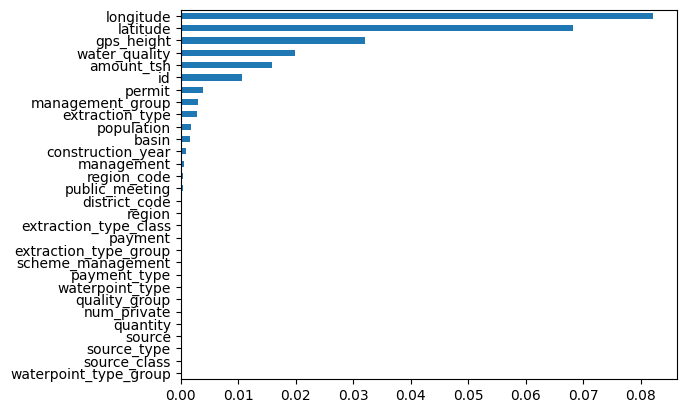

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_importances = pd.Series(model_dt.named_steps['decisiontreeclassifier'].feature_importances_[:30], X_train.columns)
feature_importances.sort_values().plot.barh()

## Kaggle Submission Screenshot

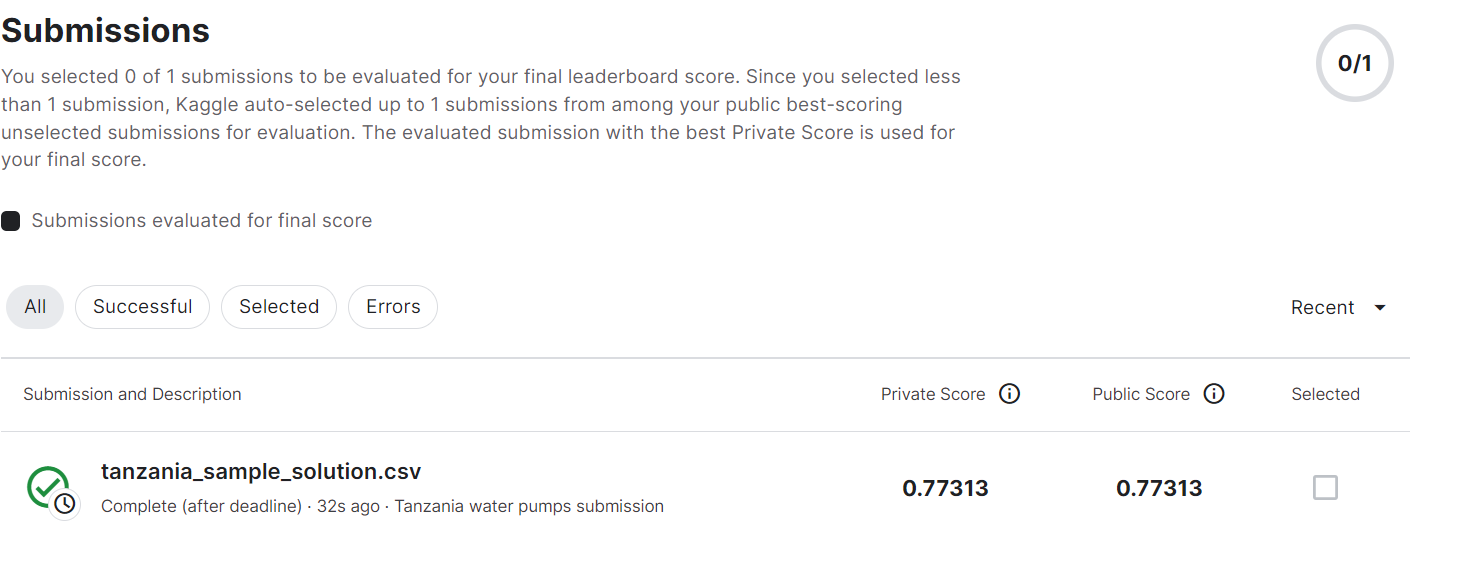